In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
def get_circle(init, radius):
    init_x,init_y = init
    theta = np.linspace(0, 2*np.pi, 100)
    xs = radius*np.cos(theta)+init_x
    ys = radius*np.sin(theta)+init_y
    return xs,ys
def project_map(ax):
    # plot the lines of common objects
    lines = [# mercer island
             ['blue',[47.591216,47.579994,47.567165,47.542171,47.542171,47.537623,47.534637,47.530799,47.524686,47.524828,47.529235,47.534637,47.539755,47.564197,47.569595,47.570874,47.578118,47.587066,47.592036,47.595586,47.592746,47.595302,47.596012,47.592320,47.593030,47.591216],
              [-122.255016,-122.251213,-122.233624,-122.238424,-122.241582,-122.244951,-122.243688,-122.239056,-122.228318,-122.224528,-122.219264,-122.213368,-122.209368,-122.209789,-122.207052,-122.204315,-122.201156,-122.224738, -122.224949,-122.227896,-122.238635,-122.241793,-122.246636,-122.250215,-122.251268,-122.255016]],
             # west border of lake washington between highways
             ['blue',[47.641674,47.590296,47.571976,47.566524,47.553050,47.553050,47.561712,47.561391,47.553691,47.548558,47.549520,47.530265,47.521597,47.500405,47.506185,47.511323,47.519029],
              [-122.278430,-122.286326,-122.279737,-122.267377,-122.259295,-122.254541,-122.254541,-122.250738,-122.245984,-122.248836,-122.256443,-122.262147,-122.260246,-122.217936,-122.201772,-122.203674,-122.212231]],
             # SR 520
             ['goldenrod',[47.642497,47.645265,47.635842,47.642967,47.641358,47.633084,47.629405,47.642507,47.655376,47.666864,47.668079,],
              [-122.322776,-122.294791,-122.227932,-122.209853,-122.198596,-122.187680,-122.153909,-122.135147,-122.138900,-122.131054,-122.109402]],
             # I-90
             ['goldenrod',[47.590848,47.589635,47.592667,47.580537,47.577909,47.579931,47.580384,47.578531,47.544475,47.539029,47.532771,],
              [-122.310882,-122.252735,-122.244642,-122.216768,-122.205078,-122.194888,-122.174675,-122.133305,-122.045242,-122.034771,-122.028248]]]
    for color,ys,xs in lines:
        xs = [lon2mi(x) for x in xs]
        ys = [lat2mi(y) for y in ys]
        ax.plot(xs, ys, color=color, linestyle='--')
    return ax
def plot_coverage(data, xlims=None, ylims=None):
    # plot the coverage
    fig,ax = plt.subplots(figsize=[8,8])
    colors = sns.color_palette('Set1')
    for idx,(init,radius) in enumerate(data):
        for radius_alt in [radius-0.5, radius+0.5]:
            xs,ys = get_circle(init, radius_alt)
            ax.plot(xs, ys, color=colors[idx])
        xs,ys = get_circle(init, radius)
        ax.plot(xs, ys, color=colors[idx], linestyle='--')
        ax.scatter(init[0], init[1], color=colors[idx])
    ax = project_map(ax)
    ax.set(xlabel='Longitude in Miles', ylabel='Latitude in Miles')
    if(xlims):
        ax.set_xlim(xlims)
    if(ylims):
        ax.set_ylim(ylims)
    return fig

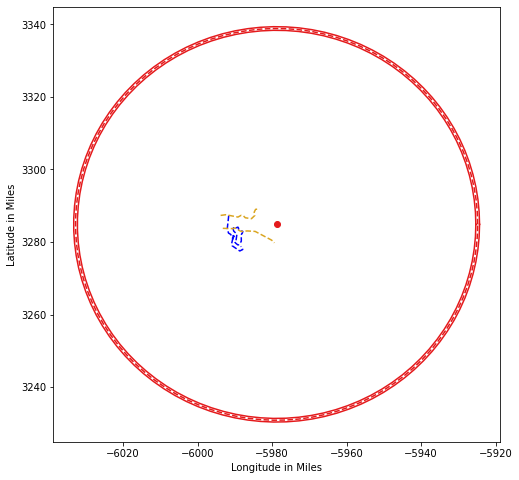

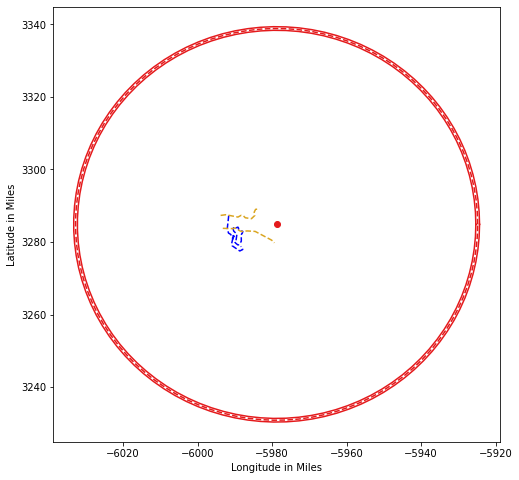

In [14]:
# data in the format where each element is (latitude,longitude),distance
data = [[(47.6067347,-122.0160443),54]]
#         [(?, ?),?],
#         [(?, ?),?]]
# convert from latitude, longtiude to miles and convert from y x to x y
lon2mi = lambda lon: lon*49
lat2mi = lambda lat: lat*69
data = [[(lon2mi(lon),lat2mi(lat)),r] for (lat,lon),r in data]
# plot_coverage(data, xlims=(-5997.5,-5980), ylims=(3270,3300))
plot_coverage(data)


In [4]:
# get back location
mi2lon = lambda mi: mi/49
mi2lat = lambda mi: mi/69
xs = [2]
ys = [3]
for x,y in zip(xs,ys):
    print(mi2lat(y), ', ', mi2lon(x), sep='')

0.043478260869565216, 0.04081632653061224
